<a href="https://colab.research.google.com/github/suhas-arun/Neural-Networks/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
from tensorflow import keras
import matplotlib.pyplot as plt

In [0]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

train_images = train_images.astype("float32")
test_images = test_images.astype("float32")
train_images /= 255
test_images /= 255

In [0]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), padding="same", activation="relu", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Conv2D(64, (3,3), padding="same", activation="relu"),
    keras.layers.MaxPooling2D((2, 2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1203 - accuracy: 0.9627
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0401 - accuracy: 0.9873
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0270 - accuracy: 0.9915
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0207 - accuracy: 0.9932
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0149 - accuracy: 0.9950
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0107 - accuracy: 0.9966
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0099 - accuracy: 0.9966
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0084 - accuracy: 0.9972
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0063 - accuracy: 0.9977
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.006

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0298 - accuracy: 0.9926

Test accuracy: 0.9926000237464905


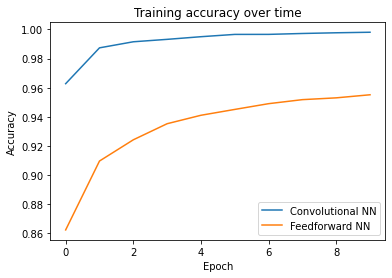

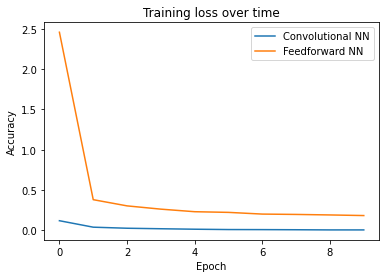

In [0]:
plt.plot(history.history["accuracy"])
plt.title("Training accuracy over time")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()